<a href="https://colab.research.google.com/github/miladasgari178/Drift_Detection_Machine_Learning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Generate gas sensor data with drift
n_samples = 14400
time = np.arange(n_samples)  # Time values from 0 to n_samples-1
sensor_output = np.random.normal(0, 1, n_samples)  # Sensor output values
real_gas_value = np.concatenate((np.zeros(n_samples // 2), np.ones(n_samples // 2)))  # Real gas values (0 and 1)

# Introduce drift at the midpoint of the day
drift_point = n_samples // 2
sensor_output[drift_point:] += 2  # Adding a drift to the sensor output values

# Combine time, sensor output, and real gas value columns
data = np.column_stack((time, sensor_output, real_gas_value))

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
pca.fit(data[:, 1:])  # Exclude the time column from PCA

# Compute the projection residuals and detect drift
drift_detected = False
for i in range(n_samples):
    sample = data[i, 1:]  # Exclude the time column from the sample

    # Transform the sample to the PCA space
    sample_pca = pca.transform(sample.reshape(1, -1))

    # Compute the reconstruction of the sample in the original space
    reconstructed_sample = pca.inverse_transform(sample_pca)

    # Compute the reconstruction error
    reconstruction_error = mean_squared_error(sample, reconstructed_sample[0])

    # Define a threshold for drift detection
    threshold = 0.1  # Adjust this threshold based on your data and requirements

    if reconstruction_error > threshold:
        drift_detected = True
        break

# Print the drift detection result
if drift_detected:
    print("Drift detected!")
else:
    print("No drift detected.")

No drift detected.


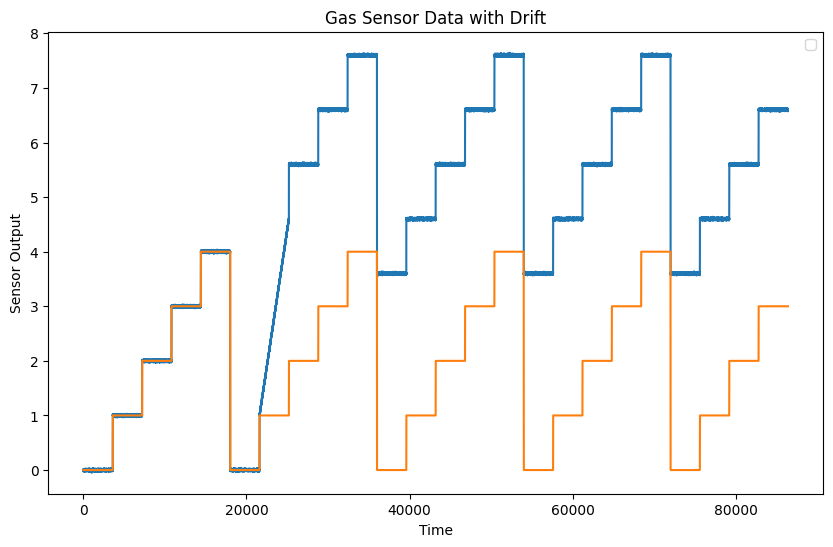

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate gas sensor data with drift
n_samples = 86400
time = np.arange(n_samples)  # Time values from 0 to n_samples-1
sensor_output = np.random.normal(0, 0.01, n_samples)  # Sensor output values
real_gas_value = np.zeros(n_samples)  # Real gas values (0 and 1)
numbers = np.arange(5)
for i in range(0,24):
  real_gas_value[i*3600:(i+1)*3600] = numbers[i%5]
  sensor_output[i*3600:(i+1)*3600]  = np.random.normal(numbers[i%5], 0.01, 3600)
# Introduce drift for one hour during the day
drift_start = n_samples // 4  # Drift starts after one-quarter of the day
drift_end = drift_start + (n_samples // (24))  # Drift lasts for one hour
drift_duration = drift_end - drift_start  # Duration of the drift
drift_amounts = np.linspace(0.001, 0.001 + (drift_duration-1) * 0.001, drift_duration)  # Incremental drift amounts


sensor_output[drift_start:drift_end] += drift_amounts  # Adding incremental drift to the sensor output values
sensor_output[drift_end:] += drift_amounts[len(drift_amounts)-1]
# Plot the sensor output values
plt.figure(figsize=(10, 6))
plt.plot(time, sensor_output)
plt.plot(time, real_gas_value)
plt.xlabel('Time')
plt.ylabel('Sensor Output')
plt.title('Gas Sensor Data with Drift')
plt.legend()
plt.show()

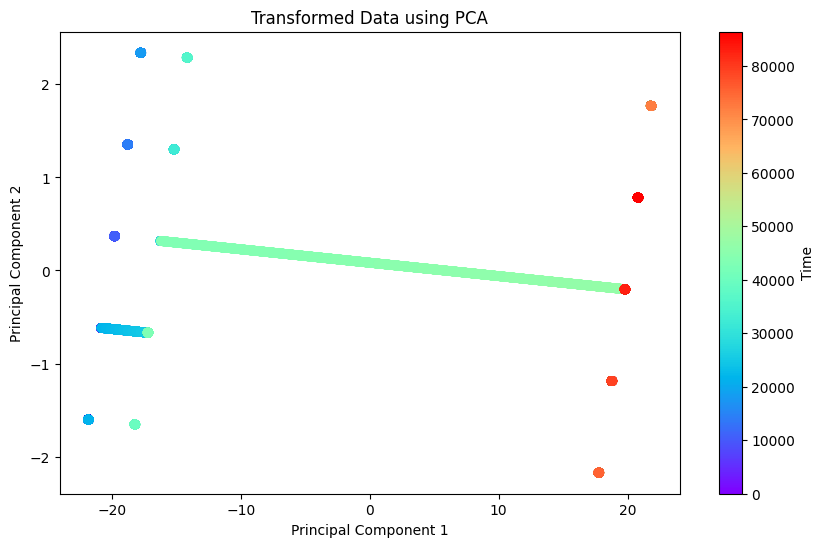

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Generate gas sensor data with drift
n_samples = 86400
time = np.arange(n_samples)  # Time values from 0 to n_samples-1
sensor_output = np.random.normal(0, 0.01, n_samples)  # Sensor output values
real_gas_value = np.zeros(n_samples)  # Real gas values (0 and 1)
numbers = np.arange(5)

for i in range(0, 24):
    real_gas_value[i*3600:(i+1)*3600] = numbers[i%5]
    sensor_output[i*3600:(i+1)*3600] = np.random.normal(numbers[i%5], 0.01, 3600)

# Introduce drift for one hour during the day
drift_start = n_samples // 4  # Drift starts after one-quarter of the day
drift_end = drift_start + (n_samples // (24))  # Drift lasts for one hour
drift_duration = drift_end - drift_start  # Duration of the drift
drift_amounts = np.linspace(0.001, 0.001 + (drift_duration-1) * 0.001, drift_duration)  # Incremental drift amounts

drift_start_2 = n_samples // 2
drift_end_2 = drift_start_2 + (n_samples // (24))
drift_duration_2 = drift_end_2 - drift_start_2
drift_amounts_2 = np.linspace(0.001, 0.001 + (drift_duration_2-1) * 0.01, drift_duration_2)  # Incremental drift amounts

sensor_output[drift_start:drift_end] += drift_amounts  # Adding incremental drift to the sensor output values
sensor_output[drift_end:] += drift_amounts[len(drift_amounts)-1]
sensor_output[drift_start_2:drift_end_2] += drift_amounts_2
sensor_output[drift_end_2:] += drift_amounts_2[len(drift_amounts_2)-1]

# Combine sensor output and real gas value arrays into a data matrix
data_matrix = np.column_stack((sensor_output, real_gas_value))

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
transformed_data = pca.fit_transform(data_matrix)

# Plot the transformed data
plt.figure(figsize=(10, 6))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=time, cmap='rainbow')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data using PCA')
plt.colorbar(label='Time')
plt.show()
